In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,join

In [5]:
#Create the engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# Tables in engine
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Review the Measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x159a24bf040>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [12]:
#Count the rows in Measurement Table
count_Measurement_rows = session.query(Measurement.id).count()
count_Measurement_rows

19550

In [13]:
# Review the Station table
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x159a24d7040>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [14]:
#Count the rows in Station Table
count_Station_rows = session.query(Station.id).count()
count_Station_rows

9

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

last_date= dt.date(int(max(session.query(Measurement.date).all())[0][:4]), 
                   int(max(session.query(Measurement.date).all())[0][5:7]), 
                   int(max(session.query(Measurement.date).all())[0][8:]))
target_date=last_date-dt.timedelta(days=365)
last_date

datetime.date(2017, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
OneYear_Precip=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= target_date).\
                order_by(Measurement.date).all()
OneYear_Precip


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(OneYear_Precip, columns = ['date', 'precipitation'])
precip_df=precip_df.set_index('date')
precip_df=precip_df.dropna()
precip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [18]:
# Sort the dataframe by date
precip_df=precip_df.sort_values(by='date',ascending=True)
precip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


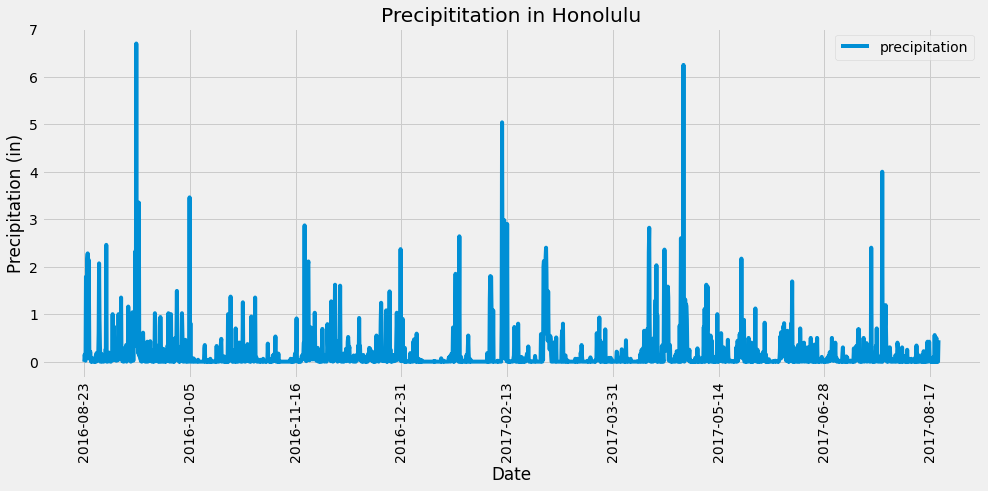

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax= plt.subplots(figsize = (15, 6))
precip_df.plot(ax = ax)
ax.set_title('Precipititation in Honolulu')
ax.set_ylabel('Precipitation (in)')
ax.set_xlabel('Date')
plt.xticks(rotation=90)
plt.savefig("Images/Image1.png")
plt.tight_layout
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
stations=session.query(Station.station).distinct().count()
stations

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations=session.query(Measurement.station,func.count(Measurement.id)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

for stations in most_active_stations:
    print(f'Station: {stations[0]}\tCount: {stations[1]}')

Station: USC00519281	Count: 2772
Station: USC00519397	Count: 2724
Station: USC00513117	Count: 2709
Station: USC00519523	Count: 2669
Station: USC00516128	Count: 2612
Station: USC00514830	Count: 2202
Station: USC00511918	Count: 1979
Station: USC00517948	Count: 1372
Station: USC00518838	Count: 511


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active=most_active_stations[0][0]
temperatures=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
            filter(Measurement.station==most_active).all()

print(f'Lowest Temperature for station {most_active}: {temperatures[0][0]} F')
print(f'Highest Temperature for station {most_active}: {temperatures[0][1]} F')
print(f'Average Temperature for station {most_active}: {round(temperatures[0][2],2)} F')

Lowest Temperature for station USC00519281: 54.0 F
Highest Temperature for station USC00519281: 85.0 F
Average Temperature for station USC00519281: 71.66 F


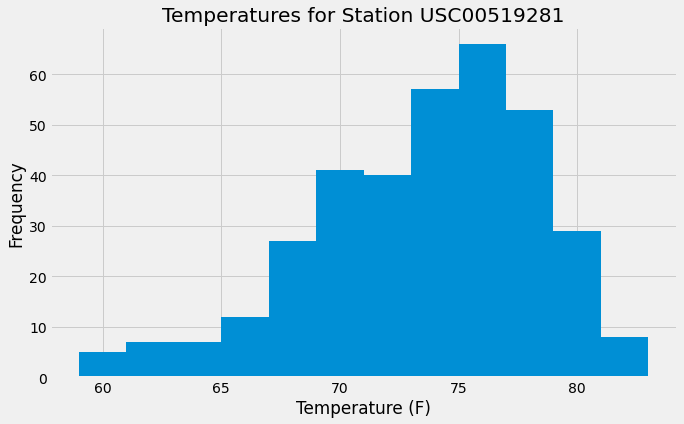

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_temp=session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
            order_by(func.count(Measurement.tobs).desc()).all()
most_temp_station=most_temp[0][0]

year_temps=session.query(Measurement.tobs).filter(Measurement.station==most_temp_station).\
        filter(Measurement.date >= target_date).order_by(Measurement.date).all()
temp_df = pd.DataFrame(year_temps, columns = ['Temperature'])

fig, ax= plt.subplots(figsize = (10, 6))
plt.hist(temp_df['Temperature'],bins=12)
ax.set_title(f'Temperatures for Station {most_temp_station}')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Frequency')
plt.savefig("Images/Image2.png")
plt.tight_layout
plt.show()


## Bonus Challenge Assignment

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_trip='2017-07-10'
end_trip='2017-07-26'
print(calc_temps(start_trip, end_trip))

[(69.0, 78.39090909090909, 84.0)]


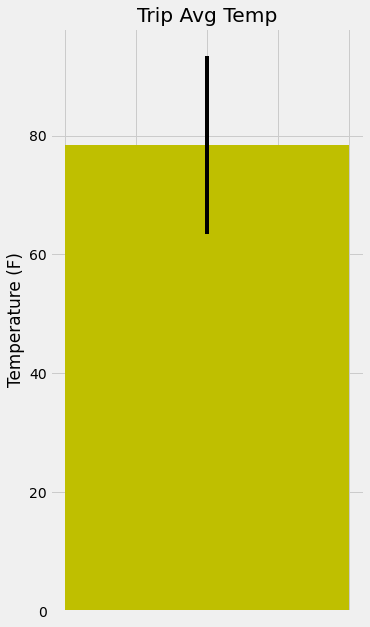

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_temp=calc_temps(start_trip, end_trip)[0][0]
avg_temp=calc_temps(start_trip, end_trip)[0][1]
max_temp=calc_temps(start_trip, end_trip)[0][2]

fig, ax= plt.subplots(figsize = (5, 10))
plt.bar(1,height=avg_temp,yerr = (max_temp-min_temp), color='y')
ax.set_title(f'Trip Avg Temp')
ax.set_ylabel('Temperature (F)')
ax.set_xticklabels([""])
plt.savefig("Images/Image3.png")
plt.tight_layout
plt.show()

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

all_station_data=session.query(Measurement.station, Station.name,Station.latitude, Station.longitude, Station.elevation,func.sum(Measurement.prcp) ).\
                select_from(join(Measurement, Station, Measurement.station==Station.station)).\
                filter(Measurement.date <= end_trip).\
                filter(Measurement.date >= start_trip).\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp).desc()).all()

results_df = pd.DataFrame(all_station_data, columns = ['Station','Station Name','Latitude','Longitude','Elevation','Total Rain Fall'])
results_df


,Station,Station Name,Latitude,Longitude,Elevation,Total Rain Fall
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,12.13
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.63
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2.22
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.57
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.49
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.30
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]
trip_dates=[]
trip_full_dates=[]

year=int(start_trip[0:4])
month=int(start_trip[5:7])
start_day=int(start_trip[8:10])
end_day=int(end_trip[8:10])

# Use the start and end date to create a range of dates
for i in range (start_day,end_day+1):
    trip_dates.append(f'0{month}-{i}')
    trip_full_dates.append(f'{year}-0{month}-{i}')

    # Loop through the list of %m-%d strings and calculate the normals for each date
for i in trip_dates:
    normals.append(daily_normals(i)[0])
    
normals

[(68.0, 75.62068965517241, 82.0),
 (70.0, 75.78947368421052, 81.0),
 (67.0, 75.96491228070175, 82.0),
 (69.0, 76.1896551724138, 81.0),
 (61.0, 76.2280701754386, 82.0),
 (68.0, 76.2542372881356, 82.0),
 (70.0, 76.34482758620689, 83.0),
 (70.0, 76.30188679245283, 83.0),
 (72.0, 76.63793103448276, 83.0),
 (68.0, 75.89090909090909, 83.0),
 (69.0, 75.46296296296296, 82.0),
 (69.0, 76.9245283018868, 83.0),
 (69.0, 75.78846153846153, 81.0),
 (70.0, 76.20370370370371, 84.0),
 (69.0, 76.55555555555556, 81.0),
 (67.0, 76.89090909090909, 84.0),
 (71.0, 76.4423076923077, 86.0)]

In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_daily_normal_df=pd.DataFrame(normals, columns=['Minimum Temperature','Avg. Temperature','Maximum Temperature'])
trip_daily_normal_df['Date']=trip_full_dates
trip_daily_normal_df=trip_daily_normal_df.set_index('Date')
trip_daily_normal_df.head(20)

,Minimum Temperature,Avg. Temperature,Maximum Temperature
Date,,,
2017-07-10,68.0,75.620690,82.0
2017-07-11,70.0,75.789474,81.0
2017-07-12,67.0,75.964912,82.0
2017-07-13,69.0,76.189655,81.0
2017-07-14,61.0,76.228070,82.0
2017-07-15,68.0,76.254237,82.0
2017-07-16,70.0,76.344828,83.0
2017-07-17,70.0,76.301887,83.0
2017-07-18,72.0,76.637931,83.0


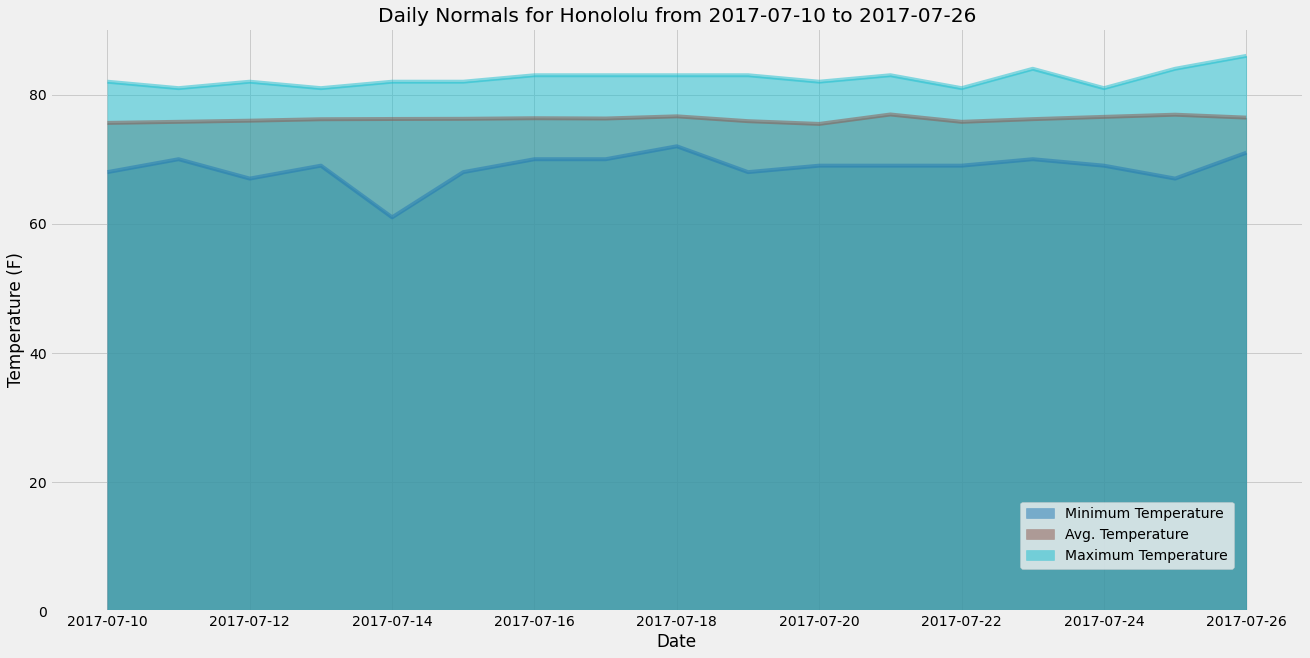

In [34]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax= plt.subplots(figsize = (20, 10))
trip_daily_normal_df.plot.area(ax = ax, stacked = False,colormap="tab10")
ax.set_title(f'Daily Normals for Honololu from {trip_full_dates[0]} to {trip_full_dates[-1]}')
ax.set_xlabel('Date')
ax.get_legend().set_bbox_to_anchor((0.95, 0.2))
ax.set_ylabel('Temperature (F)')
plt.savefig("Images/Image4.png")
plt.tight_layout
plt.show()